In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
import git
import time
from pathlib import Path
import os
import csv

import scipy.io

%matplotlib inline

# get git info for RMG model
rmg_model_path = "../../../../meOH-synthesis"
repo = git.Repo(rmg_model_path)
date = time.localtime(repo.head.commit.committed_date)
git_date = time.strftime("%Y_%m_%d_%H%M", date)
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
git_file_string = f"{git_date}_{git_sha}_{git_msg}"
current_commit = git_file_string
current_commit

# load in experimental data
# exclude feed 8 because it is a monolith reactor
path_str = "../../Graaf_data/combined_experimental_runs.xlsx"
df_graaf = pd.read_excel(path_str , engine='openpyxl') 

## load matlab data

In [2]:
# load in initial conditions from experiment from matlab
ml_results_file = "matlab_grabow_results.csv"
translation = {39: None, 91: None, 93: None} # remove ', [, and ]
count = 0
first_row=True

    
for path in Path("../../Grabow_matlab_data/new_runs").rglob('*.mat'):
    # get feed number and run number from file name
    path_str = str(path)
    file_name = path_str.split("/")[-1]
    feed = int(file_name.split("_")[2])
    run = int(file_name.split("_")[4].split(".")[0])
    
    mat = scipy.io.loadmat(path_str)
    conditions = mat['condition']
    reactions = mat['reaction']
    
    # get relevant TOFs, catalyst weights, # sites
#     meoh_TOF = float(conditions["MeOH_TOF"])
#     h2o_TOF = float(conditions["H2O_TOF"])
    cat_weight = float(conditions["CatalystWeight"])
    num_sites = float(conditions["Sites"])
    
    #read in species names to use as columns in dataframe
    species_names = []

    for spec in range(len(mat['species'][0,:])):
        species_string = str(mat['species'][0,spec][0])
        species_string = species_string.translate(translation)
        species_names.append(species_string)

    # read in results (surface coverages, partial pressures)
    results = mat['Y']

    if first_row:
        # create data frame with species names as column headers
        df_grabow = pd.DataFrame(data=results,columns=species_names)
        df_grabow = df_grabow.tail(1)
        df_grabow["feed"] = feed
        df_grabow["run"] = run
#         df_grabow["MeOH TOF (1/s)"] = meoh_TOF
#         df_grabow["H2O TOF (1/s)"] = h2o_TOF
        df_grabow["Catalyst Weight (g)"] = cat_weight
        df_grabow["Number of Sites (mol)"] = num_sites 
        
        # get total pressure by adding each species partial pressure
        total_pressure = 0
        for column in df_grabow:
            if "g" in column[-1].strip():
                total_pressure += float(df_grabow[column])
        df_grabow["total pressure (bar)"] = total_pressure
        
        first_row = False
    else: 
        # add tail from new dataframe
        new_df = pd.DataFrame(data=results,columns=species_names)
        new_df = new_df.tail(1)
        new_df["feed"] = feed
        new_df["run"] = run
#         new_df["MeOH TOF (1/s)"] = meoh_TOF
#         new_df["H2O TOF (1/s)"] = h2o_TOF
        new_df["Catalyst Weight (g)"] = cat_weight
        new_df["Number of Sites (mol)"] = num_sites 
        
        # get total pressure by adding each species partial pressure
        total_pressure = 0
        for column in new_df:
            if "g" in column[-1].strip():
                total_pressure += float(new_df[column])
                
        new_df["total pressure (bar)"] = total_pressure
        
        df_grabow = df_grabow.append(new_df, ignore_index=True)


# convert all partial pressures to mole fractions 
# any value with a "g" (gas) after the species name
for column in df_grabow:
    if "g" in column[-1].strip():
        df_grabow[column] = df_grabow[column]/df_grabow["total pressure (bar)"]

# truncate dataframe so we only have packed bed reactors
# feed 8 (feed 10 in matlab) is the monolith reactor 
# (1,2,3,4,5,6a,6b,7a,7b,8)
# (1,2,3,4,5,6, 7, 8, 9,10)
df_grabow_trunc = df_grabow[(df_grabow["feed"] < 10)]

# append graaf data to this df for easy plotting
for column in df_graaf:
    column_data = []
    for index_grabow, row_grabow in df_grabow_trunc.iterrows():
        for index_graaf, row_graaf in df_graaf.iterrows():
            if (row_grabow["feed"] == row_graaf["Feed number"]) and (row_grabow["run"] == row_graaf["run"]):
                column_data.append(row_graaf[column])
    column_name = f"graaf {str(column)}"
    df_grabow_trunc = df_grabow_trunc.assign(**{column_name:column_data})

    
df_grabow_trunc.to_csv("check_data.csv")

/home/blais.ch/.conda/envs/rmg_julia_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  """
/home/blais.ch/.conda/envs/rmg_julia_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


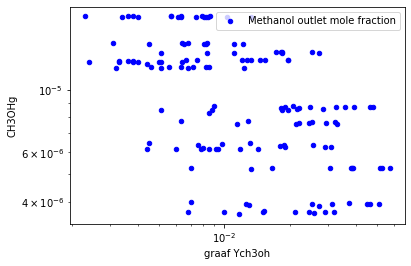

In [3]:
df_grabow_trunc[df_grabow_trunc["feed"]<6].plot.scatter(x='graaf Ych3oh',
                              y='CH3OHg', 
                              label=f"Methanol outlet mole fraction", 
                              color="b", logy=True, logx=True)
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)


# compare Mean absolute error in mole fraction MeOH
master

In [4]:
# get git info for RMG model
rmg_model_path = "../../../../meOH-synthesis"
repo = git.Repo(rmg_model_path)
repo.git.checkout('master')
date = time.localtime(repo.head.commit.committed_date)
git_date = time.strftime("%Y_%m_%d_%H%M", date)
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
git_file_string = f"{git_date}_{git_sha}_{git_msg}"
current_commit = git_file_string
current_commit

# load in cantera runs of RMG model
# exclude CSP, transient, non-graaf, non-sensitivity data

exclude = ["/csp/", "/transient/", "thermo_sensitivity", "no_experiment_comparison"]
    
first_file = True
first_line = True

file_name = f'{current_commit.replace("/","_",2)}_Graaf_ss_runs_all.csv'

with open(file_name, mode='w') as file:
    writer = csv.writer(file)

# iterate over all csv files in current directory
    for path in Path("../" + current_commit).rglob('*.csv'):
        path_str = str(path)
        print(path)

        # make sure forbidden strings are not included in filepath
        if all(f not in path_str for f in exclude):
            # make sure file size is not 0
            if os.stat(path_str).st_size != 0:

                if first_file == True: 
                    with open(path_str, "r") as f:
                        reader = csv.reader(f)
                        for line in reader: 
                            if first_line: 
                                writer.writerow(line)
                                first_line=False
                            else:
                                pass
                        writer.writerow(line)
                        
                    first_file = False 
                    f.close()
                else: 
                    with open(path_str, "r") as f:
                        reader = csv.reader(f)
                        for line in reader: 
                            pass
                        writer.writerow(line)
                    f.close()
file.close()

# load in the data to a pandas dataframe
df_rmg_master = pd.read_csv(file_name)
print("complete")

EmptyDataError: No columns to parse from file

In [ ]:
file_name = "2021_09_22_0110_268b46_ran_with_sandia_reaction_added_in_Surface_Methane__Graaf_ss_runs_all.csv"

df_rmg_master = pd.read_csv(file_name)

In [ ]:
# volume flow at T and P 
df_rmg_master['Volume flow at T and P (m^3/s)']=(101325*df_rmg_master["V (M^3/s)"]*df_rmg_master["T (K)"])/(df_rmg_master['P (Pa)']*298)

# residence time
df_rmg_master["residence time (s)"] =(((3.5e-2)**2)*np.pi*(7e-2))/2/(df_rmg_master['Volume flow at T and P (m^3/s)'])

# residence time/ catalyst weight
df_rmg_master["Residence Time / Cat Weight (s/kg)"] = df_rmg_master["residence time (s)"]/df_rmg_master["catalyst weight (kg)"]

# pressure in bar
df_rmg_master["P (bar)"] = df_rmg_master["P (Pa)"]*1e-5

# get rounded pressures for easier grouping of data
rounded_P = []
for i in df_rmg_master["P (bar)"].iteritems():
    if i[1]>13 and i[1] < 17:
        rounded_P.append(15)
    elif i[1]>18 and i[1] < 22:
        rounded_P.append(20)
    elif i[1]>28 and i[1] < 32:
        rounded_P.append(30)
    elif i[1]>48 and i[1] < 52:
        rounded_P.append(50)
    else:
        print(i[1])
df_rmg_master["P (bar) rounded"] = rounded_P

# match grabow values by run and feed number to the corresponding cantera run values
site_density = 2.943e-9*100**2 #[mol/m^2], converted from mol/cm^2

graaf_ch3oh = []
graaf_h2o = []
graaf_meoh_TOF = []
graaf_h2o_TOF = []

for index_rmg, row_rmg in df_rmg_master.iterrows():
    for index_graaf, row_graaf in df_graaf.iterrows():
        if (row_rmg["feed"] == row_graaf["Feed number"]) and (row_rmg["run"] == row_graaf["run"]):
            graaf_ch3oh.append(row_graaf["Ych3oh"])
            graaf_h2o.append(row_graaf["Yh2o"])
            graaf_meoh_TOF.append(row_graaf['MeOH TOF (mol/site/s)'])
            graaf_h2o_TOF.append(row_graaf['H2O TOF (mol/site/s)'])
            

                        
df_rmg_master["sites (moles)"] = df_rmg_master["catalyst weight (kg)"]*5*61.67*1e-6*1e3
df_rmg_master["graaf H2O"] = graaf_h2o
df_rmg_master["graaf ch3oh"] = graaf_ch3oh
df_rmg_master["graaf MeOH TOF (mol/site/s)"] = graaf_meoh_TOF
df_rmg_master["graaf H2O TOF (mol/site/s)"] = graaf_h2o_TOF
df_rmg_master["RMG MeOH TOF (mol/site/s)"] = df_rmg_master["CH3OH(8) surface ROP [kmol/m^2 s]"]*1e3*df_rmg_master["sites (moles)"]/((site_density)*10**4)
df_rmg_master["RMG H2O TOF (mol/site/s)"] = df_rmg_master["H2O(5) surface ROP [kmol/m^2 s]"]*1e3*df_rmg_master["sites (moles)"]/((site_density)*10**4)

In [ ]:
df_rmg_master["CH3OH(8)"].max()

In [ ]:
df_rmg_master["ch3oh diff"] = abs(df_rmg_master["graaf ch3oh"]- df_rmg_master["CH3OH(8)"])

In [ ]:
df_rmg_master["ch3oh diff"].max()

In [ ]:
df_rmg_master["ch3oh diff"].mean()

In [ ]:
df_rmg_master["P (bar) rounded"].unique()

In [ ]:
for i in df_rmg_master["P (bar) rounded"].unique():
    df_rmg_master[
        (df_rmg_master["T (K)"] > 484) &\
        (df_rmg_master["T (K)"] < 500) &\
        (df_rmg_master["P (bar) rounded"] == i)].plot.scatter(x='graaf MeOH TOF (mol/site/s)',
                                                       y='RMG MeOH TOF (mol/site/s)', 
                                                       label=f"{i} bar", 
                                                       color="b")
    plt.gca().set_xlim(left=0)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
for i in df_rmg_master["P (bar) rounded"].unique():
    df_rmg_master[
        (df_rmg_master["T (K)"] > 484) &\
        (df_rmg_master["T (K)"] < 500) &\
        (df_rmg_master["P (bar) rounded"] == i)].plot.scatter(x='graaf H2O TOF (mol/site/s)',
                                                       y='RMG H2O TOF (mol/site/s)', 
                                                       label=f"{i} bar", 
                                                       color="b")
    plt.gca().set_xlim(left=0)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

## sandia_rates branch

In [ ]:
# get git info for RMG model
rmg_model_path = "../../../../meOH-synthesis"
repo = git.Repo(rmg_model_path)
repo.git.checkout('sandia_rates')
date = time.localtime(repo.head.commit.committed_date)
git_date = time.strftime("%Y_%m_%d_%H%M", date)
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
git_file_string = f"{git_date}_{git_sha}_{git_msg}"
current_commit = git_file_string
current_commit

# load in cantera runs of RMG model
# exclude CSP, transient, non-graaf, non-sensitivity data

exclude = ["/csp/", "/transient/", "thermo_sensitivity", "no_experiment_comparison"]
    
first_file = True
first_line = True

file_name = f'{current_commit.replace("/","_",2)}_Graaf_ss_runs_all.csv'

with open(file_name, mode='w') as file:
    writer = csv.writer(file)

# iterate over all csv files in current directory
    for path in Path("../" + current_commit).rglob('*.csv'):
        path_str = str(path)

        # make sure forbidden strings are not included in filepath
        if all(f not in path_str for f in exclude):
            # make sure file size is not 0
            if os.stat(path_str).st_size != 0:

                if first_file == True: 
                    with open(path_str, "r") as f:
                        reader = csv.reader(f)
                        for line in reader: 
                            if first_line: 
                                writer.writerow(line)
                                first_line=False
                            else:
                                pass
                        writer.writerow(line)
                        
                    first_file = False 
                    f.close()
                else: 
                    with open(path_str, "r") as f:
                        reader = csv.reader(f)
                        for line in reader: 
                            pass
                        writer.writerow(line)
                    f.close()
file.close()

# load in the data to a pandas dataframe
df_rmg_sandia = pd.read_csv(file_name)
print("complete")

In [ ]:
# volume flow at T and P 
df_rmg_sandia['Volume flow at T and P (m^3/s)']=(101325*df_rmg_sandia["V (M^3/s)"]*df_rmg_sandia["T (K)"])/(df_rmg_sandia['P (Pa)']*298)

# residence time
df_rmg_sandia["residence time (s)"] =(((3.5e-2)**2)*np.pi*(7e-2))/2/(df_rmg_sandia['Volume flow at T and P (m^3/s)'])

# residence time/ catalyst weight
df_rmg_sandia["Residence Time / Cat Weight (s/kg)"] = df_rmg_sandia["residence time (s)"]/df_rmg_sandia["catalyst weight (kg)"]

# pressure in bar
df_rmg_sandia["P (bar)"] = df_rmg_sandia["P (Pa)"]*1e-5

# get rounded pressures for easier grouping of data
rounded_P = []
for i in df_rmg_sandia["P (bar)"].iteritems():
    if i[1]>13 and i[1] < 17:
        rounded_P.append(15)
    elif i[1]>18 and i[1] < 22:
        rounded_P.append(20)
    elif i[1]>28 and i[1] < 32:
        rounded_P.append(30)
    elif i[1]>48 and i[1] < 52:
        rounded_P.append(50)
    else:
        print(i[1])
df_rmg_sandia["P (bar) rounded"] = rounded_P

# match grabow values by run and feed number to the corresponding cantera run values
site_density = 2.943e-9*100**2 #[mol/m^2], converted from mol/cm^2

graaf_ch3oh = []
graaf_h2o = []
graaf_meoh_TOF = []
graaf_h2o_TOF = []

for index_rmg, row_rmg in df_rmg_sandia.iterrows():
    for index_graaf, row_graaf in df_graaf.iterrows():
        if (row_rmg["feed"] == row_graaf["Feed number"]) and (row_rmg["run"] == row_graaf["run"]):
            graaf_ch3oh.append(row_graaf["Ych3oh"])
            graaf_h2o.append(row_graaf["Yh2o"])
            graaf_meoh_TOF.append(row_graaf['MeOH TOF (mol/site/s)'])
            graaf_h2o_TOF.append(row_graaf['H2O TOF (mol/site/s)'])
            
df_rmg_sandia["sites (moles)"] = df_rmg_sandia["catalyst weight (kg)"]*5*61.67*1e-6*1e3
df_rmg_sandia["graaf ch3oh"] = graaf_ch3oh
df_rmg_sandia["graaf H2O"] = graaf_h2o
df_rmg_sandia["graaf MeOH TOF (mol/site/s)"] = graaf_meoh_TOF
df_rmg_sandia["graaf H2O TOF (mol/site/s)"] = graaf_h2o_TOF
df_rmg_sandia["RMG MeOH TOF (mol/site/s)"] = df_rmg_sandia["CH3OH(8) surface ROP [kmol/m^2 s]"]*1e3*df_rmg_sandia["sites (moles)"]/((site_density)*10**4)
df_rmg_sandia["RMG H2O TOF (mol/site/s)"] = df_rmg_sandia["H2O(5) surface ROP [kmol/m^2 s]"]*1e3*df_rmg_sandia["sites (moles)"]/((site_density))

In [ ]:
df_rmg_sandia["graaf MeOH TOF (mol/site/s)"]

In [ ]:
df_rmg_sandia["ch3oh diff"] = abs(df_rmg_sandia["graaf ch3oh"]- df_rmg_sandia["CH3OH(8)"])

In [ ]:
df_rmg_sandia["ch3oh diff"].max()

Very small improvement in mean absolute error in mole fraction CH3OH

In [ ]:
df_rmg_master["ch3oh diff"].mean()

In [ ]:
df_rmg_sandia["ch3oh diff"].mean()

In [ ]:
df_rmg_master["MeOH TOF diff"] = abs(df_rmg_master["graaf MeOH TOF (mol/site/s)"]- df_rmg_master["RMG MeOH TOF (mol/site/s)"])


In [ ]:
df_rmg_master["MeOH TOF diff"].mean()

In [ ]:
df_rmg_sandia["MeOH TOF diff"] = abs(df_rmg_sandia["graaf MeOH TOF (mol/site/s)"]- df_rmg_sandia["RMG MeOH TOF (mol/site/s)"])

In [ ]:
df_rmg_sandia["MeOH TOF diff"].mean()

In [ ]:
df_rmg_master[
    (df_rmg_master["feed"] < 7)].plot.scatter(x='graaf ch3oh',
                                               y='CH3OH(8)', 
                                               label=f"Methanol outlet mole fraction", 
                                               color="b")
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
df_rmg_sandia[
    (df_rmg_sandia["feed"] <= 12)].plot.scatter(x='graaf ch3oh',
                                               y='CH3OH(8)', 
                                               label=f"Methanol outlet mole fraction", 
                                               color="b",
                                               logy=True, 
                                              logx=True)
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
df_rmg_sandia[
    (df_rmg_sandia["feed"] < 10)].plot.scatter(x='graaf MeOH TOF (mol/site/s)',
                                                   y='RMG MeOH TOF (mol/site/s)', 
                                                   label=f"Methanol TOF", 
                                                   color="b", logx = True, logy = True)
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
df_rmg_master["H2O TOF diff"] = abs(df_rmg_master["graaf H2O TOF (mol/site/s)"]- df_rmg_master["RMG H2O TOF (mol/site/s)"])


In [ ]:
df_rmg_master["H2O TOF diff"].mean()

In [ ]:
df_rmg_sandia["H2O TOF diff"] = abs(df_rmg_sandia["graaf H2O TOF (mol/site/s)"]- df_rmg_sandia["RMG H2O TOF (mol/site/s)"])

In [ ]:
df_rmg_sandia["H2O TOF diff"].mean()

In [ ]:
df_rmg_sandia.columns[:50]

In [ ]:
df_rmg_master.columns

In [ ]:
df_rmg_master[
    (df_rmg_master["feed"] < 7)].plot.scatter(x='graaf H2O',
                                               y='H2O(5)', 
                                               label=f"Methanol outlet mole fraction", 
                                               color="b")
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
df_rmg_sandia[
    (df_rmg_sandia["feed"] <= 7)].plot.scatter(x='graaf ch3oh',
                                               y='CH3OH(8)', 
                                               label=f"Methanol outlet mole fraction", 
                                               color="b")
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
df_rmg_sandia[
    (df_rmg_sandia["feed"] < 6)].plot.scatter(x='graaf MeOH TOF (mol/site/s)',
                                                   y='RMG MeOH TOF (mol/site/s)', 
                                                   label=f"Methanol TOF", 
                                                   color="b")
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)